# 서울시 인구, CCTV 설치 및 범죄 데이터 로드

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cctv = pd.read_excel('C:/Users/ds/Desktop/파이썬/예제/src/cctv/seoul_cctv.xlsx')

In [5]:
cctv.head(2)

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385


In [6]:
cctv.isnull().sum()
#결측치 확인

기관명         0
소계          0
2011년 이전    2
2012년       2
2013년       2
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
dtype: int64

In [7]:
cctv.fillna(0, inplace=True)
#결측치를 0으로 변경

In [8]:
cctv.isnull().sum()

기관명         0
소계          0
2011년 이전    0
2012년       0
2013년       0
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
dtype: int64

In [9]:
cctv.head(2)

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385


In [10]:
cctv.rename(columns={cctv.columns[0] : '구청별'}, inplace=True)
#기관명을 구청명으로 변경

In [11]:
cctv.head(2)

,구청별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385


In [12]:
cctv['2016년 이전'] = cctv['2011년 이전'] + cctv['2012년'] + cctv['2013년'] + cctv['2014년'] + cctv['2015년'] + cctv['2016년']
#2016년 이전 컬럼 생성

In [13]:
cctv.head(2)

,구청별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2016년 이전
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,4196.0
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,1221.0


In [15]:
cctv.to_excel('C:/Users/ds/Desktop/파이썬/예제/src/cctv/seoul_cctv1.xlsx', index = False)

In [16]:
cctv_new = cctv.drop(['2011년 이전', '2012년', '2013년','2014년','2015년','2016년'], axis = 1)
#열삭제

In [18]:
cctv_new.head(2)

,구청별,소계,2017년,2018년,2016년 이전
0,강 남 구,5221,577,448,4196.0
1,강 동 구,1879,273,385,1221.0


In [21]:
cctv_new.sort_values(by='소계', ascending=True).head()

,구청별,소계,2017년,2018년,2016년 이전
9,도 봉 구,858,117,71,670.0
24,중 랑 구,1068,66,9,993.0
2,강 북 구,1265,1,319,945.0
22,종 로 구,1471,281,101,1089.0
23,중 구,1544,317,328,899.0


In [22]:
cctv_new.sort_values(by='소계', ascending=False).head()

,구청별,소계,2017년,2018년,2016년 이전
0,강 남 구,5221,577,448,4196.0
4,관 악 구,3985,694,671,2620.0
6,구 로 구,3227,540,486,2201.0
16,성 북 구,3003,285,643,2075.0
21,은 평 구,2962,229,367,2366.0


In [26]:
popu = pd.read_excel('C:/Users/ds/Desktop/파이썬/예제/src/cctv/seoul_popu.xlsx')

In [27]:
popu.head(2)

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자


In [28]:
popu = pd.read_excel('C:/Users/ds/Desktop/파이썬/예제/src/cctv/seoul_popu.xlsx', header = 2, usecols = 'B, D, G, J, N')
#read_excel함수로 열을 선택해서 불러오기

In [30]:
popu.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


In [31]:
popu.columns = pd.Index(['구청별', '총인구', '한국인', '외국인', '고령자'])

In [32]:
popu.head(2)

,구청별,총인구,한국인,외국인,고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742


In [33]:
popu.drop(0, inplace = True)
# 첫 행 삭제 후 적용

In [35]:
popu.tail()

,구청별,총인구,한국인,외국인,고령자
21,관악구,520040,501957,18083,72249
22,서초구,438163,433951,4212,54751
23,강남구,547453,542364,5089,67085
24,송파구,673507,666635,6872,81364
25,강동구,431920,427573,4347,58770


In [36]:
popu.index = pd.Index(np.arange(0,25,1))

In [37]:
popu.head()

,구청별,총인구,한국인,외국인,고령자
0,종로구,163026,153065,9961,26742
1,중구,135633,125725,9908,22005
2,용산구,245090,228999,16091,37640
3,성동구,316463,308221,8242,42767
4,광진구,371063,355559,15504,45619


In [38]:
popu.sort_values(by='외국인', ascending=False).head()

,구청별,총인구,한국인,외국인,고령자
18,영등포구,403600,367778,35822,55673
16,구로구,438486,404497,33989,61801
17,금천구,254021,233917,20104,35739
20,관악구,520040,501957,18083,72249
5,동대문구,364338,348052,16286,57165


In [39]:
popu.sort_values(by='고령자', ascending=False).head()

,구청별,총인구,한국인,외국인,고령자
23,송파구,673507,666635,6872,81364
15,강서구,603611,596949,6662,79660
11,은평구,487666,483197,4469,77420
10,노원구,548160,543752,4408,77096
20,관악구,520040,501957,18083,72249


In [41]:
pd.merge(popu, cctv_new, on = '구청별')

,구청별,총인구,한국인,외국인,고령자,소계,2017년,2018년,2016년 이전
0,동대문구,364338,348052,16286,57165,2003,136,197,1670.0
1,서대문구,323080,310313,12767,50456,2121,415,194,1512.0
2,영등포구,403600,367778,35822,55673,2495,371,793,1331.0


In [43]:
# cctv_new 구청별 필드 값 들 공백을 없애기
for df in (popu, cctv_new):
    df['구청별'] = df['구청별'].str.replace(' ', '')

In [46]:
merged = pd.merge(popu, cctv_new, on = '구청별')

In [47]:
merged

,구청별,총인구,한국인,외국인,고령자,소계,2017년,2018년,2016년 이전
0,종로구,163026,153065,9961,26742,1471,281,101,1089.0
1,중구,135633,125725,9908,22005,1544,317,328,899.0
2,용산구,245090,228999,16091,37640,2063,60,73,1930.0
3,성동구,316463,308221,8242,42767,2679,933,294,1452.0
4,광진구,371063,355559,15504,45619,1581,468,346,767.0
5,동대문구,364338,348052,16286,57165,2003,136,197,1670.0
6,중랑구,408147,403209,4938,61830,1068,66,9,993.0
7,성북구,447687,435868,11819,67782,3003,285,643,2075.0
8,강북구,322915,319164,3751,58196,1265,1,319,945.0
9,도봉구,341649,339413,2236,55964,858,117,71,670.0


In [48]:
merged.set_index('구청별', inplace=True)

In [49]:
merged.head()

,총인구,한국인,외국인,고령자,소계,2017년,2018년,2016년 이전
구청별,,,,,,,,
종로구,163026,153065,9961,26742,1471,281,101,1089.0
중구,135633,125725,9908,22005,1544,317,328,899.0
용산구,245090,228999,16091,37640,2063,60,73,1930.0
성동구,316463,308221,8242,42767,2679,933,294,1452.0
광진구,371063,355559,15504,45619,1581,468,346,767.0


In [50]:
merged['1인당cctv비율'] = merged['소계'] / merged['총인구'] * 100

In [51]:
merged

,총인구,한국인,외국인,고령자,소계,2017년,2018년,2016년 이전,1인당cctv비율
구청별,,,,,,,,,
종로구,163026,153065,9961,26742,1471,281,101,1089.0,0.902310
중구,135633,125725,9908,22005,1544,317,328,899.0,1.138366
용산구,245090,228999,16091,37640,2063,60,73,1930.0,0.841732
성동구,316463,308221,8242,42767,2679,933,294,1452.0,0.846544
광진구,371063,355559,15504,45619,1581,468,346,767.0,0.426073
동대문구,364338,348052,16286,57165,2003,136,197,1670.0,0.549764
중랑구,408147,403209,4938,61830,1068,66,9,993.0,0.261670
성북구,447687,435868,11819,67782,3003,285,643,2075.0,0.670781
강북구,322915,319164,3751,58196,1265,1,319,945.0,0.391744


In [60]:
# 서울시 총 cctv 설치 수 대비 총 인구수 상관관계
merged['총인구'].corr(merged['소계'], method = 'pearson')

0.37523206622060185

In [57]:
merged['외국인'].corr(merged['소계'], method = 'pearson')

0.18119377441191767

In [58]:
merged['고령자'].corr(merged['소계'], method = 'pearson')

0.29570930426009

In [59]:
merged['한국인'].corr(merged['소계'], method = 'pearson')

0.3580254029717922

In [64]:
# 1인당 CCTV 설치 비율 시각화
sns.countplot(x = '1인당cctv비율',hue='구청별', data=merged)

ValueError: Could not interpret input '구청별'

In [65]:
from matplotlib import rcParams

In [66]:
params = {'legend.fontsize' : 14}
plt.rcParams.update(params)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.close('all')

In [68]:
#차트에 한글 깨질 경우 한글 스타일 가져오기
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

<Axes: ylabel='구청별'>

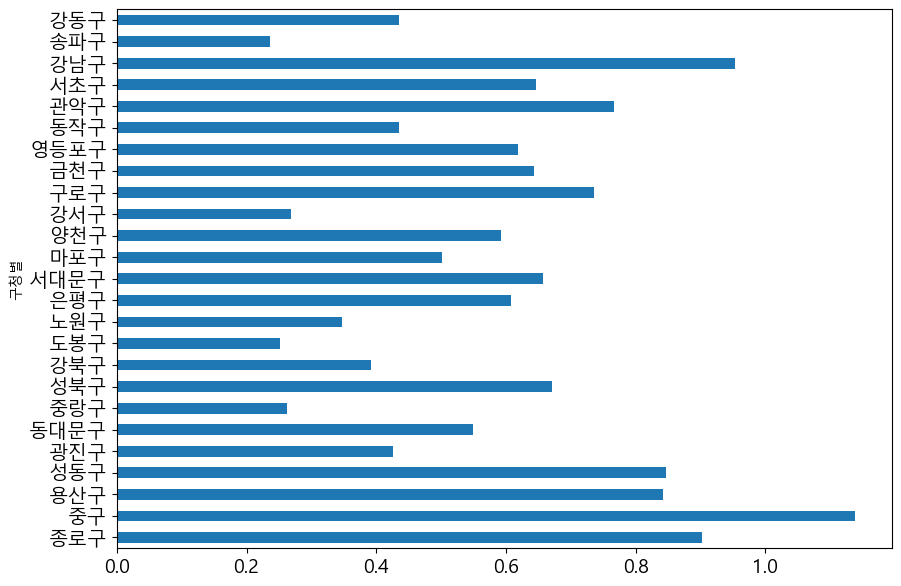

In [72]:
#기본 바 차트 그리기
merged['1인당cctv비율'].plot(kind='barh', figsize = (10,7))

<Axes: ylabel='구청별'>

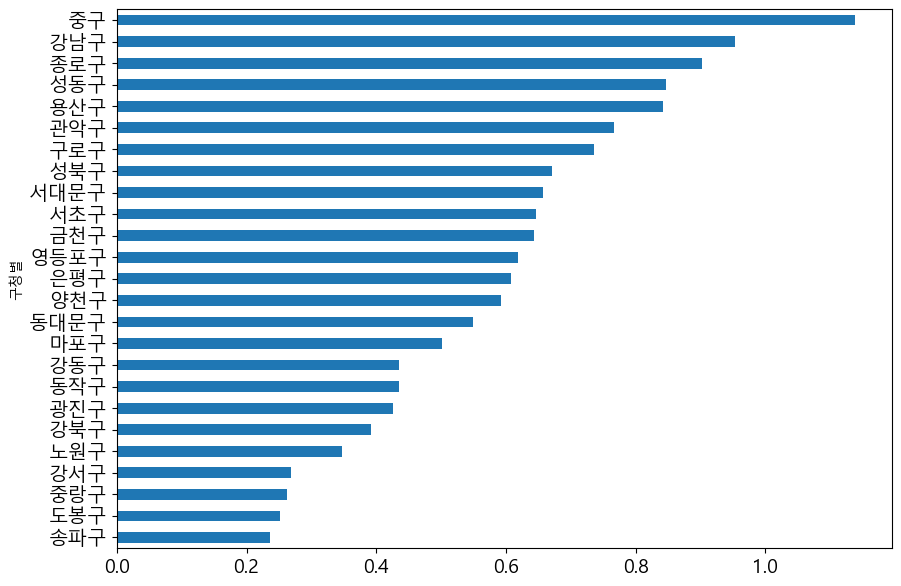

In [73]:
merged['1인당cctv비율'].sort_values().plot(kind='barh', figsize = (10,7))

In [74]:
crime = pd.read_csv('C:/Users/ds/Desktop/파이썬/예제/src/cctv/seoul_crime.csv', sep = '\t')

In [75]:
crime.head()

,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2018,합계,"101,948","74,487",143,139,143,151,"6,412","6,046","39,175","19,762","56,075","48,389"
2,2018,종로구,"3,690","3,913",6,7,3,7,236,"1,100","1,483",969,"1,962","1,830"
3,2018,중구,"4,030","2,679",2,2,11,11,207,115,"1,855",832,"1,955","1,719"
4,2018,용산구,"3,411","2,543",1,1,3,2,331,285,"1,096",522,"1,980","1,733"


In [76]:
crime = crime.iloc[2:, 1:4]

In [77]:
crime.head()

,자치구,합계,합계.1
2,종로구,"3,690","3,913"
3,중구,"4,030","2,679"
4,용산구,"3,411","2,543"
5,성동구,"2,457","1,787"
6,광진구,"3,915","2,789"


In [78]:
crime.columns = pd.Index(['구청별', '범죄건', '검거건'])

In [79]:
crime.head()

,구청별,범죄건,검거건
2,종로구,"3,690","3,913"
3,중구,"4,030","2,679"
4,용산구,"3,411","2,543"
5,성동구,"2,457","1,787"
6,광진구,"3,915","2,789"


In [80]:
crime.set_index('구청별', inplace=True)

In [81]:
crime.head()

,범죄건,검거건
구청별,,
종로구,"3,690","3,913"
중구,"4,030","2,679"
용산구,"3,411","2,543"
성동구,"2,457","1,787"
광진구,"3,915","2,789"


In [83]:
crime = crime.apply(lambda x: x.str.replace(',','').apply(pd.to_numeric))

In [84]:
crime.head()

,범죄건,검거건
구청별,,
종로구,3690,3913
중구,4030,2679
용산구,3411,2543
성동구,2457,1787
광진구,3915,2789


In [85]:
crime['검거율'] = crime['검거건'] / crime['범죄건'] * 100

In [86]:
crime.head()

,범죄건,검거건,검거율
구청별,,,
종로구,3690,3913,106.043360
중구,4030,2679,66.476427
용산구,3411,2543,74.552917
성동구,2457,1787,72.730973
광진구,3915,2789,71.238825


In [87]:
merged_final = pd.concat([merged, crime], axis = 1)

In [88]:
merged_final

,총인구,한국인,외국인,고령자,소계,2017년,2018년,2016년 이전,1인당cctv비율,범죄건,검거건,검거율
구청별,,,,,,,,,,,,
종로구,163026,153065,9961,26742,1471,281,101,1089.0,0.902310,3690,3913,106.043360
중구,135633,125725,9908,22005,1544,317,328,899.0,1.138366,4030,2679,66.476427
용산구,245090,228999,16091,37640,2063,60,73,1930.0,0.841732,3411,2543,74.552917
성동구,316463,308221,8242,42767,2679,933,294,1452.0,0.846544,2457,1787,72.730973
광진구,371063,355559,15504,45619,1581,468,346,767.0,0.426073,3915,2789,71.238825
동대문구,364338,348052,16286,57165,2003,136,197,1670.0,0.549764,3680,2968,80.652174
중랑구,408147,403209,4938,61830,1068,66,9,993.0,0.261670,4288,3222,75.139925
성북구,447687,435868,11819,67782,3003,285,643,2075.0,0.670781,3042,2277,74.852071
강북구,322915,319164,3751,58196,1265,1,319,945.0,0.391744,3437,2743,79.807972
